# VSR: MLP, tree ensemble or graphs

## Phase 1

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
base_folder = 'D:/Research/VSR+GP/'

In [3]:
best = pd.read_csv(f'{base_folder}best.csv', sep=";")
best["vx"] = best["best→fitness→s.task.l.xVelocity"]
best["signals"] = best["solver.mapper.target.signals"]
best["controller"] = best["solver.mapper.target.function.inner.inner"].apply(
    lambda x: "mlp" if "mlp" in x else "tree" if "tree" in x else "graph")
best["size"] = best["best→genotype→size"]
best["evals"] = round(best["evals"] / 100) * 100
best.head()

,solver.mapper.target.function.inner.inner,randomGenerator.seed,solver.mapper.target.signals,iterations,evals,births,elapsed.seconds,all→size,firsts→size,lasts→size,all→each[genotype]→uniqueness,all→each[solution]→uniqueness,all→each[fitness]→uniqueness,best→fitness→s.task.l.xVelocity,best→genotype→size,vx,signals,controller,size
0,er.ds.num.treeMRF(postOperator=tanh),2,1,0,100.0,100,0.000,100,2,1,1.0,1.0,1.0,0.775843,10,0.775843,1,tree,10
1,er.ds.num.treeMRF(postOperator=tanh),1,1,0,100.0,100,0.000,100,1,1,1.0,1.0,1.0,1.503910,10,1.503910,1,tree,10
2,er.ds.num.treeMRF(postOperator=tanh),3,1,0,100.0,100,0.000,100,1,1,1.0,1.0,1.0,1.318008,10,1.318008,1,tree,10
3,er.ds.num.treeMRF(postOperator=tanh),2,1,1,200.0,200,50.605,100,1,1,1.0,1.0,1.0,1.077026,10,1.077026,1,tree,10
4,er.ds.num.treeMRF(postOperator=tanh),1,1,1,200.0,200,62.027,100,3,1,1.0,1.0,1.0,1.503910,10,1.503910,1,tree,10


In [4]:
from statistics import median
from typing import List
from pandas import DataFrame


def line_plot(filename: str, df: DataFrame, x: str, y: list, groups: List[str] = None):
    def q1(x):
        return x.quantile(0.25)

    def q3(x):
        return x.quantile(0.75)

    vals = dict([(key, [q1, q3, median]) for key in y])

    summary = df.groupby(groups + [x]).agg(vals)
    summary.columns = ["_".join(col) for col in summary.columns.to_flat_index()]
    summary.reset_index(inplace=True)

    key_df = df.drop_duplicates(subset=groups)

    for i in range(len(key_df)):
        tmp = summary
        current_filename = filename
        for key in groups:
            tmp = tmp[tmp[key] == key_df[key].iloc[i]]
            current_filename += f"_{key_df[key].iloc[i]}"
        tmp.to_csv(f"{current_filename}.txt", sep="\t", index=False)

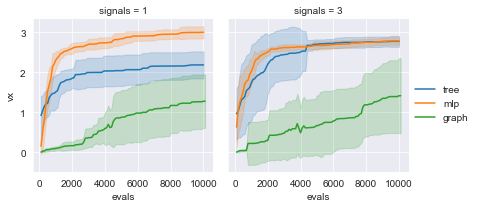

In [5]:
g = sns.FacetGrid(best, col="signals")
g.map_dataframe(sns.lineplot, x="evals", y="vx", hue="controller", errorbar="sd")
g.add_legend()
plt.show()

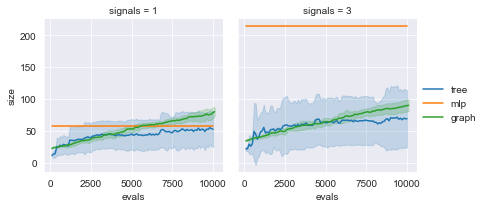

In [6]:
g = sns.FacetGrid(best, col="signals")
g.map_dataframe(sns.lineplot, x="evals", y="size", hue="controller", errorbar="sd")
g.add_legend()
plt.show()

In [7]:
line_plot(f'{base_folder}pgfplots/vx', df=best, x='evals', y=['vx'], groups=['controller', 'signals'])
line_plot(f'{base_folder}pgfplots/size', df=best, x='evals', y=['size'], groups=['controller', 'signals'])

## Phase 3

In [8]:
mse_1 = pd.read_csv(f'{base_folder}mse-best-1.csv', sep=";")
mse_3 = pd.read_csv(f'{base_folder}mse-best-3.csv', sep=";")
mse_1["signals"] = 1
mse_3["signals"] = 3
mse = pd.concat([mse_1, mse_3])
mse["learner"] = mse["solver.mapper"].apply(
    lambda x: "Lmlp" if "mlp" in x else "Ltree" if "tree" in x else "Lgraph")
mse["teacher"] = mse["problem.trainingDataset.filePath"].apply(
    lambda x: "Tmlp" if "ga" in x else "Ttree" if "gp" in x else "Tgraph")
mse["mse"] = mse["best→fitness"]
mse["evals"] = round(mse["evals"] / 100) * 100
mse.head()

,solver.mapper,randomGenerator.seed,problem.trainingDataset.filePath,iterations,evals,births,elapsed.seconds,all→size,firsts→size,lasts→size,all→each[genotype]→uniqueness,all→each[solution]→uniqueness,all→each[fitness]→uniqueness,best→fitness,best→genotype→size,signals,learner,teacher,mse
0,ea.m.mlpMRF(dataset = ea.d.num.empty(xVars = [...,1,../phase2/data-ro-ga-1-001.txt,0,100.0,100,0.0,100,1,1,1.0,1.0,1.0,0.332136,57,1,Lmlp,Tmlp,0.332136
1,ea.m.treeMRF(dataset = ea.d.num.empty(xVars = ...,4,../phase2/data-ro-ga-1-001.txt,0,100.0,100,0.0,100,1,1,1.0,1.0,1.0,0.466314,10,1,Ltree,Tmlp,0.466314
2,ea.m.treeMRF(dataset = ea.d.num.empty(xVars = ...,2,../phase2/data-ro-ga-1-001.txt,0,100.0,100,0.0,100,1,1,1.0,1.0,1.0,0.568649,10,1,Ltree,Tmlp,0.568649
3,ea.m.treeMRF(dataset = ea.d.num.empty(xVars = ...,3,../phase2/data-ro-ga-1-001.txt,0,100.0,100,0.0,100,1,1,1.0,1.0,1.0,0.600854,10,1,Ltree,Tmlp,0.600854
4,ea.m.treeMRF(dataset = ea.d.num.empty(xVars = ...,1,../phase2/data-ro-ga-1-001.txt,0,100.0,100,0.0,100,1,1,1.0,1.0,1.0,0.439697,10,1,Ltree,Tmlp,0.439697


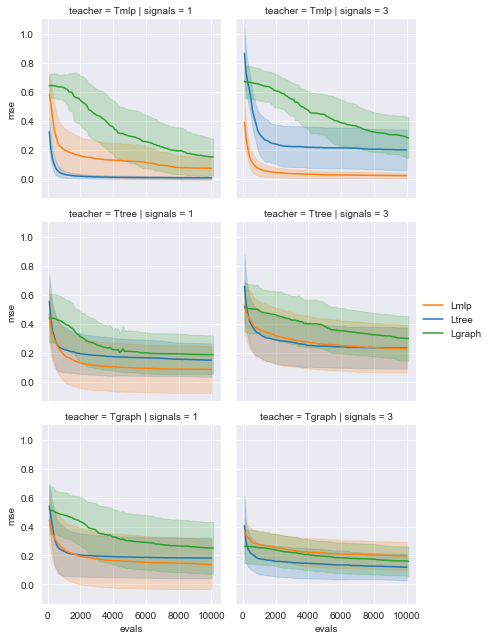

In [9]:
g = sns.FacetGrid(mse, col="signals", row="teacher")
g.map_dataframe(sns.lineplot, x="evals", y="mse", hue="learner", errorbar="sd")
g.add_legend()
plt.show()

In [10]:
line_plot(f'{base_folder}pgfplots/mse', df=mse, x='evals', y=['mse'], groups=['teacher', 'learner', 'signals'])

## Phase 4

In [11]:
dfs = []
for alg in ["ga", "gp", "graph"]:
    for signals in [1, 3]:
        filename = f'{base_folder}vx-{alg}-{signals}.tsv'
        df = pd.read_csv(filename, sep=" ", header=None, names=["learner", "teacher", "file", "vx"])
        df["signals"] = signals
        dfs.append(df)

new_vx = pd.concat(dfs)
new_vx["learner"] = new_vx["learner"].apply(
    lambda x: "Lmlp" if "mlp" in x else "Ltree" if "tree" in x else "Lgraph")
new_vx["teacher"] = new_vx["teacher"].apply(
    lambda x: "Tmlp" if "ga" in x else "Ttree" if "gp" in x else "Tgraph")
new_vx.head()

,learner,teacher,file,vx,signals
0,Lmlp,Tmlp,../phase2/data-ro-ga-1-001.txt,0.011954,1
1,Lmlp,Tmlp,../phase2/data-ro-ga-1-001.txt,0.014068,1
2,Lmlp,Tmlp,../phase2/data-ro-ga-1-001.txt,-0.003432,1
3,Lmlp,Tmlp,../phase2/data-ro-ga-1-001.txt,0.080535,1
4,Lmlp,Tmlp,../phase2/data-ro-ga-1-001.txt,1.855032,1


In [13]:
def p75(x):
    return x.quantile(0.75)


def p90(x):
    return x.quantile(0.9)


vals = dict([(key, [median, p75, p90]) for key in ["vx"]])

summary = new_vx.groupby(["learner", "teacher", "signals"]).agg(vals)
summary.columns = ["_".join(col) for col in summary.columns.to_flat_index()]
summary.reset_index(inplace=True)
summary.head()

# key_df = df.drop_duplicates(subset=groups)

for signals in [1, 3]:
    print(f"n signals = {signals}")
    for learner in ["Lmlp", "Ltree", "Lgraph"]:
        row = []
        for teacher in ["Tmlp", "Ttree", "Tgraph"]:
            tmp = summary[
                (summary["signals"] == signals) & (summary["learner"] == learner) & (summary["teacher"] == teacher)]
            row.append(f"{tmp['vx_median'].tolist()[0]:.2f}")
            row.append(f"{tmp['vx_p75'].tolist()[0]:.2f}")
            row.append(f"{tmp['vx_p90'].tolist()[0]:.2f}")
        print(f"{learner} & {' & '.join(row)} \\\\")
    print()

n signals = 1
Lmlp & 0.12 & 1.03 & 1.79 & 0.04 & 0.17 & 0.54 & 0.03 & 0.16 & 0.56 \\
Ltree & 0.00 & 0.02 & 0.07 & 0.04 & 0.14 & 0.24 & 0.02 & 0.06 & 0.11 \\
Lgraph & 0.00 & 0.01 & 0.06 & 0.05 & 0.06 & 0.13 & 0.00 & 0.04 & 0.10 \\

n signals = 3
Lmlp & 0.04 & 0.17 & 0.70 & 0.12 & 0.25 & 0.48 & 0.01 & 0.08 & 0.23 \\
Ltree & 0.00 & 0.00 & 0.01 & 0.15 & 0.20 & 0.36 & 0.02 & 0.20 & 0.35 \\
Lgraph & 0.00 & 0.00 & 0.01 & 0.00 & 0.04 & 0.17 & 0.00 & 0.01 & 0.20 \\

